In [1]:
import numpy as np
from scipy import stats
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_single = X[:, 2]

In [3]:
# Calculate Gaussian likelihood
def calculate_likelihood(mu, sigma, x, y):
    """Calculate likelihood using Gaussian distribution"""
    return np.sum(stats.norm.logpdf(y, mu + x, sigma))


In [4]:
def calculate_prior(sigma):
    """Return 1 if sigma > 0, else 0"""
    return 1 if sigma > 0 else 0

In [5]:
# Calculate marginal likelihood using Monte Carlo
def calculate_marginal_likelihood(x, y):
    """Monte Carlo integration for marginal likelihood"""
    n_samples = 10000
    mu_samples = np.random.uniform(-1000, 1000, n_samples)
    sigma_samples = np.random.uniform(0.1, 1000, n_samples)

    integral = 0
    for mu, sigma in zip(mu_samples, sigma_samples):
        likelihood = np.exp(calculate_likelihood(mu, sigma, x, y))
        prior = calculate_prior(sigma)
        integral += likelihood * prior

    return integral / n_samples

In [6]:
# Maximum Likelihood Estimation
def perform_mle(X_single, y):
    """Perform Maximum Likelihood Estimation"""
    lr = LinearRegression()
    lr.fit(X_single.reshape(-1, 1), y)
    return lr.predict(X_single.reshape(-1, 1))

In [7]:
# Marginal Likelihood Estimation
def perform_marginal_estimation(X_single, y):
    """Perform Marginal Likelihood Estimation"""
    mu_range = np.linspace(-100, 100, 50)
    sigma_range = np.linspace(0.1, 100, 50)

    max_marginal = -np.inf
    best_mu = None

    for mu in mu_range:
        for sigma in sigma_range:
            current_marginal = calculate_likelihood(mu, sigma, X_single, y)
            if current_marginal > max_marginal:
                max_marginal = current_marginal
                best_mu = mu

    return best_mu + X_single

In [8]:
# Plot results
def plot_comparison(X_single, y, y_pred_mle, y_pred_marginal):
    """Plot the comparison between MLE and Marginal Likelihood"""
    plt.figure(figsize=(12, 6))
    plt.scatter(X_single, y, color='blue', alpha=0.5, label='Data')
    plt.plot(X_single, y_pred_mle, color='red', label='MLE')
    plt.plot(X_single, y_pred_marginal, color='green', label='Marginal')
    plt.legend()
    plt.title('Comparison of MLE vs Marginal Likelihood Estimation')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

In [9]:
# Calculate MSE
def calculate_mse(y_true, y_pred):
    """Calculate Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

In [10]:
def main():
    y_pred_mle = perform_mle(X_single, y)
    y_pred_marginal = perform_marginal_estimation(X_single, y)

    plot_comparison(X_single, y, y_pred_mle, y_pred_marginal)

    mle_mse = calculate_mse(y, y_pred_mle)
    marginal_mse = calculate_mse(y, y_pred_marginal)

    print(f"MLE MSE: {mle_mse:.2f}")
    print(f"Marginal Likelihood MSE: {marginal_mse:.2f}")

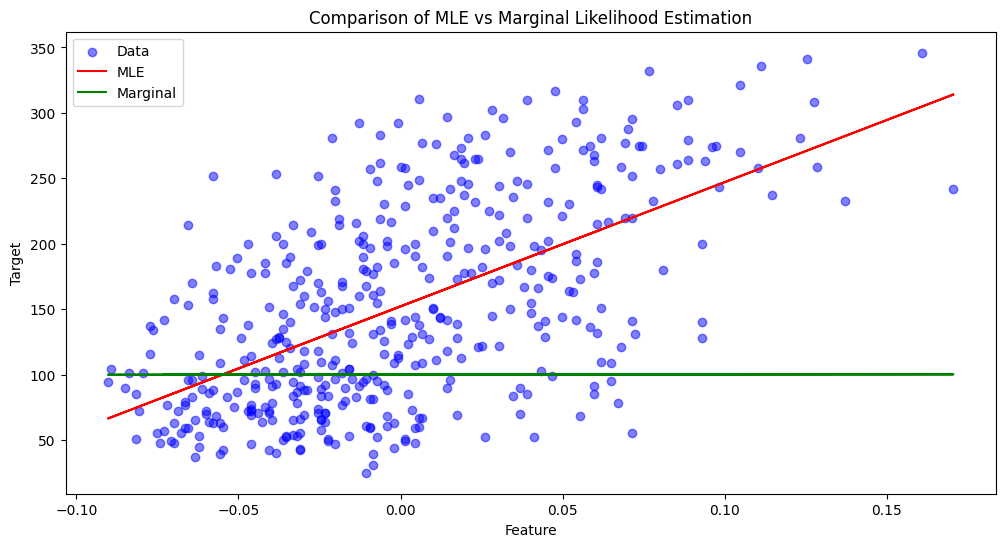

MLE MSE: 3890.46
Marginal Likelihood MSE: 8643.49


In [11]:
if __name__ == "__main__":
    main()